In [92]:
import wandb
from PIL import Image
from fastcore.all import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from hydranet.utils import *

In [93]:
run = wandb.init()
artifact = run.use_artifact('hydranet/HydraNet/NYUDepth:v0', type='dataset')

wandb: ERROR Problem finishing run
Traceback (most recent call last):
  File "/home/paperspace/mambaforge/envs/pt/lib/python3.9/site-packages/wandb/sdk/wandb_run.py", line 1788, in _atexit_cleanup
    self._on_finish()
  File "/home/paperspace/mambaforge/envs/pt/lib/python3.9/site-packages/wandb/sdk/wandb_run.py", line 1934, in _on_finish
    self.history._flush()
  File "/home/paperspace/mambaforge/envs/pt/lib/python3.9/site-packages/wandb/sdk/wandb_history.py", line 59, in _flush
    self._callback(row=self._data, step=self._step)
  File "/home/paperspace/mambaforge/envs/pt/lib/python3.9/site-packages/wandb/sdk/wandb_run.py", line 1017, in _history_callback
    self._backend.interface.publish_history(
  File "/home/paperspace/mambaforge/envs/pt/lib/python3.9/site-packages/wandb/sdk/interface/interface.py", line 496, in publish_history
    data = data_types.history_dict_to_json(run, data, step=step)
  File "/home/paperspace/mambaforge/envs/pt/lib/python3.9/site-packages/wandb/sdk/data

In [94]:
artifact_dir = Path(artifact.download())

wandb: Downloading large artifact NYUDepth:v0, 765.48MB. 4349 files... Done. 0:0:0


In [95]:
wandb.finish()

In [96]:
table = wandb.Table(columns=["rgb", "depth", "label"])

for fname in (artifact_dir/"rgb").ls():
    table.add_data(wandb.Image(str(fname)), 
                   wandb.Image(str(artifact_dir/f"depth/{fname.name}")), 
                   wandb.Image(str(artifact_dir/f"masks/{fname.name}")))

In [97]:
wandb.init(project="HydraNet", entity="hydranet")
wandb.log({"NYU_dataset":table})

In [98]:
wandb.finish()

In [99]:
wandb.Object3D(

Init signature:
wandb.Object3D(
    data_or_path: Union[ForwardRef('np.ndarray'), str, ForwardRef('TextIO')],
    **kwargs: str,
) -> None
Source:        
class Object3D(BatchableMedia):
    """
    Wandb class for 3D point clouds.

    Arguments:
        data_or_path: (numpy array, string, io)
            Object3D can be initialized from a file or a numpy array.

            You can pass a path to a file or an io object and a file_type
            which must be one of `"obj"`, `"gltf"`, `"glb"`, `"babylon"`, `"stl"`, `"pts.json"`.

    The shape of the numpy array must be one of either:
    ```python
    [[x y z],       ...] nx3
    [x y z c],     ...] nx4 where c is a category with supported range [1, 14]
    [x y z r g b], ...] nx4 where is rgb is color
    ```
    """

    SUPPORTED_TYPES: ClassVar[Set[str]] = set(
        ["obj", "gltf", "glb", "babylon", "stl", "pts.json"]
    )
    _log_type: ClassVar[str] = "object3D-file"

    def __init__(
        self, data_or_path: Union["n

In [ ]:
Image.fromarray(np.uint8(cm.viridis(image_array)*255))

In [9]:
artifact_dir.ls()

(#5) [Path('artifacts/NYUDepth:v0/.DS_Store'),Path('artifacts/NYUDepth:v0/depth'),Path('artifacts/NYUDepth:v0/masks'),Path('artifacts/NYUDepth:v0/rgb'),Path('artifacts/NYUDepth:v0/cmap_nyud.npy')]

In [19]:
def get_image_tuple(fname='000155.png'):
    fnames_tup = artifact_dir/f"rgb/{fname}", artifact_dir/f"depth/{fname}", artifact_dir/f"masks/{fname}"
    return tuple(Image.open(fn) for fn in fnames_tup)

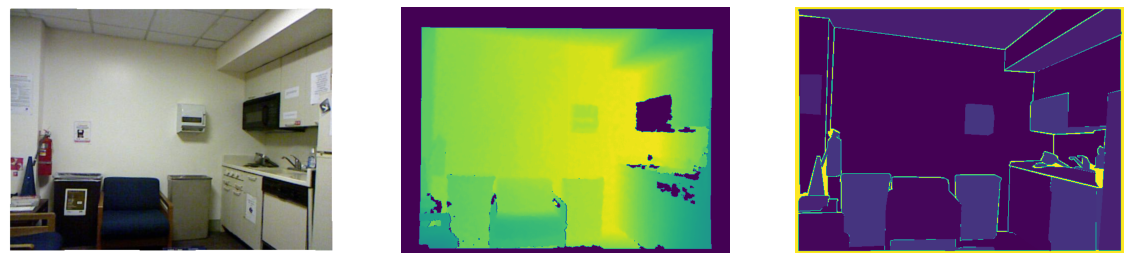

In [24]:
show_images(get_image_tuple('000001.png'), figsize=(20,10))

In [83]:
_,_, mask = get_image_tuple('000001.png')

In [90]:
np.unique(np.array(mask)[50:-50, 50:-50])

array([  0,   2,   4,   6,  11,  21,  25,  37,  38,  39, 255], dtype=uint8)